In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import nltk

In [2]:
msg = pd.read_csv(r"spam1.csv", encoding = "cp1252")

In [3]:
msg.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
msg = msg.iloc[:,[0,1]]

In [5]:
msg.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
msg.rename(columns = {'v1':'Label' , 'v2':'Message'}, inplace=True)

In [7]:
msg.Label.replace({'spam':1 , 'ham':0}, inplace=True)

C:\Users\om\AppData\Local\Temp\ipykernel_8080\1553915951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  msg.Label.replace({'spam':1 , 'ham':0}, inplace=True)
C:\Users\om\AppData\Local\Temp\ipykernel_8080\1553915951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  msg.Label.replace({'spam':1 

In [8]:
msg.Label.value_counts()

Label
0    5854
1     922
Name: count, dtype: int64

In [9]:
msg.head()

Label                                            Message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

In [10]:
# Whenever  we are doing NLP either we will convert  data into uppper case to lower case because python is case censitive.

In [11]:
msg.Message = msg.Message.str.lower()

In [12]:
msg.head()

Label                                            Message
0      0  go until jurong point, crazy.. available only ...
1      0                      ok lar... joking wif u oni...
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0  u dun say so early hor... u c already then say...
4      0  nah i don't think he goes to usf, he lives aro...

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
import string

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# we will remove the stopwords , punctuations and then tokenization and create TDM
# After this do ther samppling , build the model and then do the preditions.

In [19]:
def text_process(mess):
    """
    1. Remove the punctuation.
    2. Remove the stopwords.
    3. return the list of clean textwords.
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# it is used to give the count for each unique word.

In [21]:
after_trans = CountVectorizer(analyzer = text_process).fit(msg['Message'])

In [22]:
len(after_trans.vocabulary_)

9422

In [23]:
# Building the TDM 

In [24]:
tdmspamdata = after_trans.transform(msg['Message'])

In [25]:
tdmspamdata.shape

(6776, 9422)

In [26]:
type(tdmspamdata)

scipy.sparse._csr.csr_matrix

In [27]:
tdmspamdata.toarray()[0::]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
abc = tdmspamdata.toarray()

In [29]:
abc = pd.DataFrame(abc)

In [30]:
abc.shape

(6776, 9422)

In [31]:
abc.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     1   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [32]:
# Sampling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_x , test_x , train_y , test_y = train_test_split(tdmspamdata, msg.Label , test_size = 0.2)

In [35]:
# After sampling we can use any of our classsification mopdel

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
nb_spam = MultinomialNB()

In [38]:
nb_spam.fit(train_x , train_y)

MultinomialNB()

In [39]:
pred = nb_spam.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(test_y , pred)

array([[1152,   18],
       [  11,  175]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(test_y , pred)

0.9786135693215339

In [44]:
from wordcloud import WordCloud

In [45]:
WordCloud

wordcloud.wordcloud.WordCloud

In [46]:
wd_word = WordCloud(stopwords = stopwords.words('english'), max_words=15 , random_state=123).generate(str(msg['Message']))

In [47]:
wd_word

In [48]:
import matplotlib.pyplot as plt

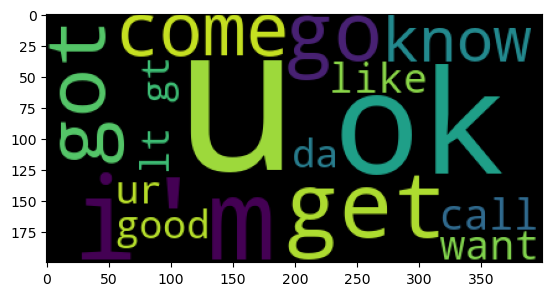

In [49]:
plt.imshow(wd_word)

In [71]:
#Sentimental Analysis

In [75]:
# for sentiment analysis we are going to use two libraries
# 1. Text Blob
# 2. Vader

In [108]:
from textblob import TextBlob

In [110]:
text1 = 'food made at the restauranbt was excellent'
abcd = TextBlob(text1)

In [112]:
abcd.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [120]:
text1 = 'India is a good country'
abcd = TextBlob(text1)

In [121]:
abcd.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)